In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
import math
import pprint
from sklearn import preprocessing
from sklearn.preprocessing import scale
from sklearn.metrics import mean_squared_error

In [2]:
data = pd.read_csv('JPM_sent_news.csv')

In [3]:
data['date']= data['publication_date']
#data['date']= pd.to_datetime(data.publication_date,format='%Y-%m-%d')
#data =data.set_index['date']
#data = date.drop(['publication_date'], axis=1)

In [4]:
data['date']= pd.to_datetime(data.publication_date,format='%Y-%m-%d')

In [5]:
data = data.set_index('date')

In [6]:
data = data.drop(['publication_date'], axis=1)

In [7]:
data[:100]

,compound,headline,neg,neu,pos,label
date,,,,,,
2015-07-21 19:12:17,0.2960,Citi ordered to pay $770 million over credit c...,0.117,0.667,0.217,1
2015-08-14 17:16:07,-0.3182,BNP Paribas to pay $115 mln to settle currency...,0.268,0.732,0.000,-1
2015-09-17 22:39:02,0.0000,Wall Street banks eye December for Fed liftoff...,0.000,1.000,0.000,0
2015-10-05 16:43:23,-0.1779,Global business growth at weakest pace this ye...,0.221,0.604,0.174,-1
2015-10-13 14:09:06,0.0000,Barclays set to name former JPMorgan banker St...,0.000,1.000,0.000,0
2015-10-14 00:17:23,0.2732,JPMorgan goes on a diet to appease regulators,0.000,0.741,0.259,1
2015-10-15 18:19:27,0.1027,Goldman profit plunges as market turmoil hits ...,0.202,0.565,0.234,1
2015-12-02 22:37:26,0.1280,Exclusive: Barclays' boss wants Blythe Masters...,0.000,0.870,0.130,1
2015-12-28 21:14:43,0.0000,JPMorgan to raise deposit rates for some big c...,0.000,1.000,0.000,0


In [8]:
news_daily = data.resample('D').mean()

In [9]:
# Resample the full dataframe to monthly timeframe
#news_daily = data.resample('D').mean()



In [10]:
news_daily.fillna(0, inplace=True)
news_daily.head()

,compound,neg,neu,pos,label
date,,,,,
2015-07-21,0.296,0.117,0.667,0.217,1.0
2015-07-22,0.000,0.000,0.000,0.000,0.0
2015-07-23,0.000,0.000,0.000,0.000,0.0
2015-07-24,0.000,0.000,0.000,0.000,0.0
2015-07-25,0.000,0.000,0.000,0.000,0.0


In [11]:
news_daily=news_daily.loc['2016-07-01':'2019-07-01']
news_daily.head()

,compound,neg,neu,pos,label
date,,,,,
2016-07-01,0.7783,0.0,0.541,0.459,1.0
2016-07-02,0.0000,0.0,0.000,0.000,0.0
2016-07-03,0.0000,0.0,0.000,0.000,0.0
2016-07-04,0.0000,0.0,1.000,0.000,0.0
2016-07-05,0.0000,0.0,1.000,0.000,0.0


In [12]:
news_daily.describe()

,compound,neg,neu,pos,label
count,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000
mean,0.070449,0.038489,0.709395,0.082408,0.151286
std,0.144265,0.052439,0.330678,0.079515,0.316816
min,-0.743000,0.000000,0.000000,0.000000,-1.000000
25%,0.000000,0.000000,0.754250,0.000000,0.000000
50%,0.050855,0.025539,0.843455,0.075640,0.111111
75%,0.120065,0.056277,0.896595,0.117271,0.266667
max,0.848100,0.558000,1.000000,0.714000,1.000000


### Fundamental Data

In [70]:
fund = pd.read_csv('JPM_Fund.csv')
fund.tail()

,date,marketcap,pricetobook,pricetoearnings,dividendyield,earningsyield,nopat,freecashflow,roe,ebitdagrowth,...,ebitda,totalassets,totalliabilities,debt,netincome,netcashfromoperatingactivities,netcashfrominvestingactivities,netcashfromfinancingactivities,longterminvestments,one_yr_monthly_beta
777,25/06/2019,2.090000e+11,0.8999,10.3864,0.028773,0.096280,32941000000,4223000000,0.1268,0.103592,...,49367000000,2.740000e+12,2.480000e+12,3.620000e+11,32941000000,32941000000,-1.170000e+11,43004000000,43004000000,1.2381
778,26/06/2019,2.080000e+11,0.8978,10.3628,0.028839,0.096499,32941000000,4223000000,0.1268,0.103592,...,49367000000,2.740000e+12,2.480000e+12,3.620000e+11,32941000000,32941000000,-1.170000e+11,43004000000,43004000000,1.2381
779,27/06/2019,2.090000e+11,0.9013,10.4032,0.028727,0.096124,32941000000,4223000000,0.1268,0.103592,...,49367000000,2.740000e+12,2.480000e+12,3.620000e+11,32941000000,32941000000,-1.170000e+11,43004000000,43004000000,1.2381
780,28/06/2019,2.060000e+11,0.8890,10.2602,0.029127,0.097464,32941000000,4223000000,0.1268,0.103592,...,49367000000,2.740000e+12,2.480000e+12,3.620000e+11,32941000000,32941000000,-1.170000e+11,43004000000,43004000000,1.2381
781,01/07/2019,2.070000e+11,0.8943,10.3225,0.028952,0.096876,32941000000,4223000000,0.1268,0.103592,...,49367000000,2.740000e+12,2.480000e+12,3.620000e+11,32941000000,32941000000,-1.170000e+11,43004000000,43004000000,1.2125


In [71]:
fund['date']= pd.to_datetime(fund.date,format='%d/%m/%Y')

In [72]:

fund.index =fund['date']

In [73]:
fund=fund.loc['2016/07/01':'2019/07/01']

In [74]:
fund.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 782 entries, 2016-07-01 to 2019-07-01
Data columns (total 32 columns):
date                              782 non-null datetime64[ns]
marketcap                         782 non-null float64
pricetobook                       782 non-null float64
pricetoearnings                   782 non-null float64
dividendyield                     782 non-null float64
earningsyield                     782 non-null float64
nopat                             782 non-null int64
freecashflow                      782 non-null int64
roe                               782 non-null float64
ebitdagrowth                      782 non-null float64
ebitdamargin                      782 non-null float64
cashdividendspershare             782 non-null float64
bookvaluepershare                 782 non-null float64
debttoequity                      782 non-null float64
epsgrowth                         782 non-null float64
investedcapitalgrowth             782 non-null f

### Price analysis

In [75]:
df_price = pd.read_csv('JPM_price.csv')

In [76]:
df_price['date']= df_price['date']
df_price['date']=pd.to_datetime(df_price.date,format='%Y-%m-%d')
df_price.index =df_price['date']

In [77]:
#df_price = df_price.drop(['date'], axis=1)

In [78]:
df_price.head()

,Unnamed: 0,adj_close,adj_high,adj_low,adj_open,adj_volume,close,date,frequency,high,intraperiod,low,open,volume
date,,,,,,,,,,,,,,
2019-08-07,0,108.03,108.28,105.940,108.00,16523288.0,108.03,2019-08-07,daily,108.28,False,105.940,108.00,17320865.0
2019-08-06,1,110.43,110.50,108.340,110.05,10203487.0,110.43,2019-08-06,daily,110.50,False,108.340,110.05,10203487.0
2019-08-05,2,109.57,110.98,108.265,110.79,15855328.0,109.57,2019-08-05,daily,110.98,False,108.265,110.79,15855328.0
2019-08-02,3,112.93,113.43,111.400,112.40,11025527.0,112.93,2019-08-02,daily,113.43,False,111.400,112.40,11025527.0
2019-08-01,4,112.94,116.80,112.595,115.33,15664530.0,112.94,2019-08-01,daily,116.80,False,112.595,115.33,15664530.0


In [79]:
df_price=df_price[::-1]

In [80]:
df_price.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1200 entries, 2014-10-30 to 2019-08-07
Data columns (total 14 columns):
Unnamed: 0     1200 non-null int64
adj_close      1200 non-null float64
adj_high       1200 non-null float64
adj_low        1200 non-null float64
adj_open       1200 non-null float64
adj_volume     1200 non-null float64
close          1200 non-null float64
date           1200 non-null datetime64[ns]
frequency      1200 non-null object
high           1200 non-null float64
intraperiod    1200 non-null bool
low            1200 non-null float64
open           1200 non-null float64
volume         1200 non-null float64
dtypes: bool(1), datetime64[ns](1), float64(10), int64(1), object(1)
memory usage: 132.4+ KB


In [81]:
import talib
for n in [14, 30, 50, 200]:

    # Create the moving average indicator and divide by Adj_Close
    df_price['ma' + str(n)] = df_price.adj_close.rolling(window=n).mean()
    
    # Create the RSI indicator
    df_price['rsi' + str(n)] = talib.RSI(df_price['adj_close'].values, timeperiod=n)

In [82]:
df_price.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1200 entries, 2014-10-30 to 2019-08-07
Data columns (total 22 columns):
Unnamed: 0     1200 non-null int64
adj_close      1200 non-null float64
adj_high       1200 non-null float64
adj_low        1200 non-null float64
adj_open       1200 non-null float64
adj_volume     1200 non-null float64
close          1200 non-null float64
date           1200 non-null datetime64[ns]
frequency      1200 non-null object
high           1200 non-null float64
intraperiod    1200 non-null bool
low            1200 non-null float64
open           1200 non-null float64
volume         1200 non-null float64
ma14           1187 non-null float64
rsi14          1186 non-null float64
ma30           1171 non-null float64
rsi30          1170 non-null float64
ma50           1151 non-null float64
rsi50          1150 non-null float64
ma200          1001 non-null float64
rsi200         1000 non-null float64
dtypes: bool(1), datetime64[ns](1), float64(18), int64(1), o

In [83]:
df_price[:100]

,Unnamed: 0,adj_close,adj_high,adj_low,adj_open,adj_volume,close,date,frequency,high,...,open,volume,ma14,rsi14,ma30,rsi30,ma50,rsi50,ma200,rsi200
date,,,,,,,,,,,,,,,,,,,,,
2014-10-30,1199,52.475467,52.731703,52.060187,52.077858,14709756.0,59.39,2014-10-30,daily,59.6800,...,58.94,14709756.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-10-31,1198,53.438563,53.491577,52.899582,53.120476,18351059.0,60.48,2014-10-31,daily,60.5400,...,60.12,18351059.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-11-03,1197,53.791992,54.030557,53.332534,53.712471,11854189.0,60.88,2014-11-03,daily,61.1500,...,60.79,11854189.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-11-04,1196,53.235341,53.341369,52.501974,53.226505,15295771.0,60.25,2014-11-04,daily,60.3700,...,60.24,15295771.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-11-05,1195,54.030557,54.101243,53.359041,53.721306,14063812.0,61.15,2014-11-05,daily,61.2300,...,60.80,14063812.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-11-06,1194,54.101243,54.172017,53.571099,53.968707,10421612.0,61.23,2014-11-06,daily,61.3101,...,61.08,10421612.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-11-07,1193,54.313301,54.383987,53.774321,53.959871,12384620.0,61.47,2014-11-07,daily,61.5500,...,61.07,12384620.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-11-10,1192,54.719745,54.719745,54.074736,54.118915,10800981.0,61.93,2014-11-10,daily,61.9300,...,61.25,10800981.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-11-11,1191,54.224944,54.684402,54.154258,54.525359,12539830.0,61.37,2014-11-11,daily,61.8900,...,61.71,12539830.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [84]:
df_price=df_price.loc['2016-07-01':'2019-07-01']

In [85]:
df_price.ma200

date
2016-07-01     56.603027
2016-07-05     56.596957
2016-07-06     56.601559
2016-07-07     56.605672
2016-07-08     56.618015
2016-07-11     56.633614
2016-07-12     56.655419
2016-07-13     56.671407
2016-07-14     56.698560
2016-07-15     56.726622
2016-07-18     56.748573
2016-07-19     56.768032
2016-07-20     56.788588
2016-07-21     56.802540
2016-07-22     56.817979
2016-07-25     56.832267
2016-07-26     56.847761
2016-07-27     56.865089
2016-07-28     56.882304
2016-07-29     56.899688
2016-08-01     56.923361
2016-08-02     56.937718
2016-08-03     56.954308
2016-08-04     56.971387
2016-08-05     56.995175
2016-08-08     57.020123
2016-08-09     57.038876
2016-08-10     57.051807
2016-08-11     57.065438
2016-08-12     57.079598
                 ...    
2019-05-20    105.972755
2019-05-21    105.963747
2019-05-22    105.945659
2019-05-23    105.916602
2019-05-24    105.890771
2019-05-28    105.857866
2019-05-29    105.827888
2019-05-30    105.797733
2019-05-31    105.77

In [86]:
df_price.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 754 entries, 2016-07-01 to 2019-07-01
Data columns (total 22 columns):
Unnamed: 0     754 non-null int64
adj_close      754 non-null float64
adj_high       754 non-null float64
adj_low        754 non-null float64
adj_open       754 non-null float64
adj_volume     754 non-null float64
close          754 non-null float64
date           754 non-null datetime64[ns]
frequency      754 non-null object
high           754 non-null float64
intraperiod    754 non-null bool
low            754 non-null float64
open           754 non-null float64
volume         754 non-null float64
ma14           754 non-null float64
rsi14          754 non-null float64
ma30           754 non-null float64
rsi30          754 non-null float64
ma50           754 non-null float64
rsi50          754 non-null float64
ma200          754 non-null float64
rsi200         754 non-null float64
dtypes: bool(1), datetime64[ns](1), float64(18), int64(1), object(1)
memory usage: 

In [87]:
#df.join(other, lsuffix='_caller', rsuffix='_other')
df_price = df_price.join(news_daily['compound'])
#full_df = pd.merge(df_price,news_daily['compound'],how='left')

In [88]:
df_price=pd.merge(df_price,fund,how='outer',on='date')

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2963: FutureWarning: 'date' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  exec(code_obj, self.user_global_ns, self.user_ns)


In [89]:
df_price.index =df_price['date']

In [90]:
df_price.head()

,Unnamed: 0,adj_close,adj_high,adj_low,adj_open,adj_volume,close,date,frequency,high,...,ebitda,totalassets,totalliabilities,debt,netincome,netcashfromoperatingactivities,netcashfrominvestingactivities,netcashfromfinancingactivities,longterminvestments,one_yr_monthly_beta
date,,,,,,,,,,,,,,,,,,,,,
2016-07-01,779.0,56.820952,57.517997,56.728199,57.062112,14217796.0,61.26,2016-07-01,daily,62.0115,...,36165000000,2.470000e+12,2.210000e+12,3.330000e+11,23958000000,23958000000,-2.255500e+10,77000000,77000000,1.0578
2016-07-05,778.0,55.234863,56.208778,54.817471,56.069647,23357694.0,59.55,2016-07-05,daily,60.6000,...,36165000000,2.470000e+12,2.210000e+12,3.330000e+11,23958000000,23958000000,-2.255500e+10,77000000,77000000,1.0578
2016-07-06,777.0,55.828487,55.921241,54.502109,54.733993,20429800.0,60.19,2016-07-06,daily,60.2900,...,36165000000,2.470000e+12,2.210000e+12,3.330000e+11,23958000000,23958000000,-2.255500e+10,77000000,77000000,1.0578
2016-07-07,776.0,56.190227,56.709648,55.800661,56.134575,13771417.0,60.58,2016-07-07,daily,61.1400,...,36165000000,2.470000e+12,2.210000e+12,3.330000e+11,23958000000,23958000000,-2.255500e+10,77000000,77000000,1.0578
2016-07-08,775.0,57.349649,57.665012,56.885880,56.885880,16998814.0,61.83,2016-07-08,daily,62.1700,...,36165000000,2.470000e+12,2.210000e+12,3.330000e+11,23958000000,23958000000,-2.255500e+10,77000000,77000000,1.0578


In [91]:
df_price['Unnamed: 0'].drop

<bound method Series.drop of date
2016-07-01    779.0
2016-07-05    778.0
2016-07-06    777.0
2016-07-07    776.0
2016-07-08    775.0
2016-07-11    774.0
2016-07-12    773.0
2016-07-13    772.0
2016-07-14    771.0
2016-07-15    770.0
2016-07-18    769.0
2016-07-19    768.0
2016-07-20    767.0
2016-07-21    766.0
2016-07-22    765.0
2016-07-25    764.0
2016-07-26    763.0
2016-07-27    762.0
2016-07-28    761.0
2016-07-29    760.0
2016-08-01    759.0
2016-08-02    758.0
2016-08-03    757.0
2016-08-04    756.0
2016-08-05    755.0
2016-08-08    754.0
2016-08-09    753.0
2016-08-10    752.0
2016-08-11    751.0
2016-08-12    750.0
              ...  
2019-06-28     27.0
2019-07-01     26.0
2016-07-04      NaN
2016-09-05      NaN
2016-11-24      NaN
2016-12-26      NaN
2017-01-02      NaN
2017-01-16      NaN
2017-02-20      NaN
2017-04-14      NaN
2017-05-29      NaN
2017-07-04      NaN
2017-09-04      NaN
2017-11-23      NaN
2017-12-25      NaN
2018-01-01      NaN
2018-01-15      NaN
2018-0

In [92]:
df_price.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 782 entries, 2016-07-01 to 2019-05-27
Data columns (total 54 columns):
Unnamed: 0                        754 non-null float64
adj_close                         754 non-null float64
adj_high                          754 non-null float64
adj_low                           754 non-null float64
adj_open                          754 non-null float64
adj_volume                        754 non-null float64
close                             754 non-null float64
date                              782 non-null datetime64[ns]
frequency                         754 non-null object
high                              754 non-null float64
intraperiod                       754 non-null object
low                               754 non-null float64
open                              754 non-null float64
volume                            754 non-null float64
ma14                              754 non-null float64
rsi14                             754 non-null

In [93]:
df_price['ebitda'] = df_price['ebitda'].astype(float)

In [94]:
df_price.columns

Index(['Unnamed: 0', 'adj_close', 'adj_high', 'adj_low', 'adj_open',
       'adj_volume', 'close', 'date', 'frequency', 'high', 'intraperiod',
       'low', 'open', 'volume', 'ma14', 'rsi14', 'ma30', 'rsi30', 'ma50',
       'rsi50', 'ma200', 'rsi200', 'compound', 'marketcap', 'pricetobook',
       'pricetoearnings', 'dividendyield', 'earningsyield', 'nopat',
       'freecashflow', 'roe', 'ebitdagrowth', 'ebitdamargin',
       'cashdividendspershare', 'bookvaluepershare', 'debttoequity',
       'epsgrowth', 'investedcapitalgrowth', 'fcffgrowth', 'finleverage',
       'netincomegrowth', 'roa', 'revenuegrowth', 'basiceps', 'ebitda',
       'totalassets', 'totalliabilities', 'debt', 'netincome',
       'netcashfromoperatingactivities', 'netcashfrominvestingactivities',
       'netcashfromfinancingactivities', 'longterminvestments',
       'one_yr_monthly_beta'],
      dtype='object')

In [95]:
fundamentals=['marketcap', 'pricetobook','pricetoearnings', 'dividendyield', 'earningsyield', 'nopat','freecashflow', 'roe', 'ebitdagrowth', 'ebitdamargin',
       'cashdividendspershare', 'bookvaluepershare',
       'debttoequity', 'epsgrowth', 'investedcapitalgrowth', 'fcffgrowth',
       'finleverage', 'netincomegrowth', 'roa', 'revenuegrowth', 'basiceps',
        'ebitda', 'totalassets', 'totalliabilities', 'debt',
       'netincome', 'netcashfromoperatingactivities',
       'netcashfrominvestingactivities', 'netcashfromfinancingactivities',
       'longterminvestments','one_yr_monthly_beta']

In [96]:
for column in fundamentals:
    df_price[column] = df_price[column].astype(float)

In [97]:
df_price.head()

,Unnamed: 0,adj_close,adj_high,adj_low,adj_open,adj_volume,close,date,frequency,high,...,ebitda,totalassets,totalliabilities,debt,netincome,netcashfromoperatingactivities,netcashfrominvestingactivities,netcashfromfinancingactivities,longterminvestments,one_yr_monthly_beta
date,,,,,,,,,,,,,,,,,,,,,
2016-07-01,779.0,56.820952,57.517997,56.728199,57.062112,14217796.0,61.26,2016-07-01,daily,62.0115,...,3.616500e+10,2.470000e+12,2.210000e+12,3.330000e+11,2.395800e+10,2.395800e+10,-2.255500e+10,77000000.0,77000000.0,1.0578
2016-07-05,778.0,55.234863,56.208778,54.817471,56.069647,23357694.0,59.55,2016-07-05,daily,60.6000,...,3.616500e+10,2.470000e+12,2.210000e+12,3.330000e+11,2.395800e+10,2.395800e+10,-2.255500e+10,77000000.0,77000000.0,1.0578
2016-07-06,777.0,55.828487,55.921241,54.502109,54.733993,20429800.0,60.19,2016-07-06,daily,60.2900,...,3.616500e+10,2.470000e+12,2.210000e+12,3.330000e+11,2.395800e+10,2.395800e+10,-2.255500e+10,77000000.0,77000000.0,1.0578
2016-07-07,776.0,56.190227,56.709648,55.800661,56.134575,13771417.0,60.58,2016-07-07,daily,61.1400,...,3.616500e+10,2.470000e+12,2.210000e+12,3.330000e+11,2.395800e+10,2.395800e+10,-2.255500e+10,77000000.0,77000000.0,1.0578
2016-07-08,775.0,57.349649,57.665012,56.885880,56.885880,16998814.0,61.83,2016-07-08,daily,62.1700,...,3.616500e+10,2.470000e+12,2.210000e+12,3.330000e+11,2.395800e+10,2.395800e+10,-2.255500e+10,77000000.0,77000000.0,1.0578


### EDA

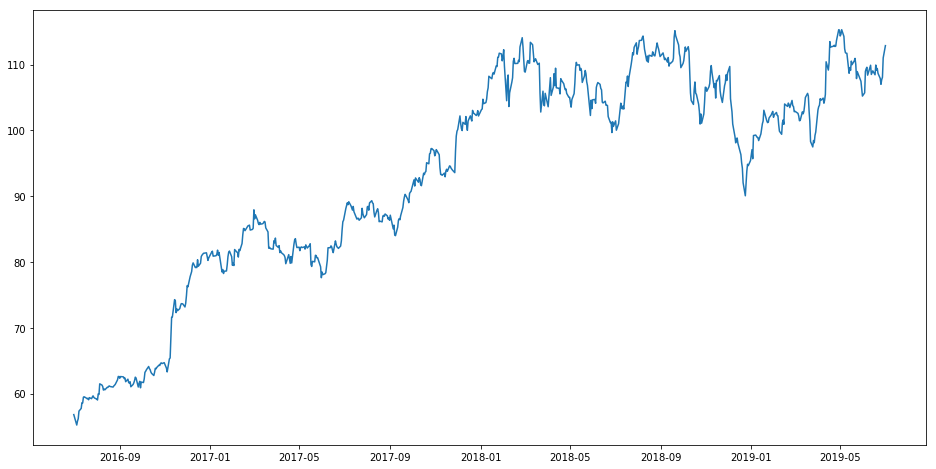

In [98]:
#plot
plt.figure(figsize=(16,8))
plt.plot(df_price['adj_close'], label='Close Price history')

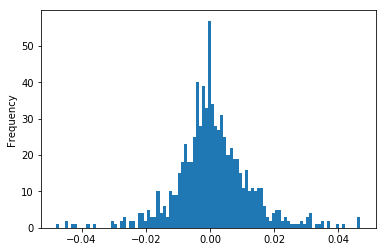

In [99]:
df_price['adj_close'].pct_change().plot.hist(bins=100)

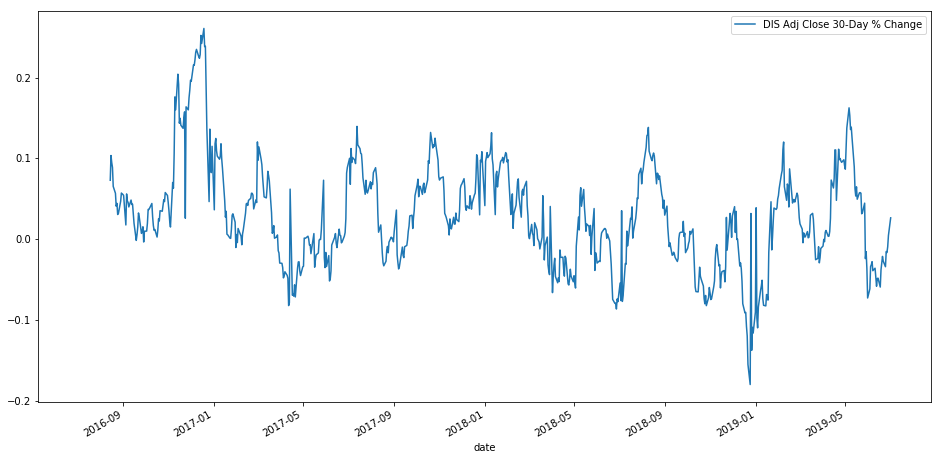

In [100]:
plt.figure(figsize=(16,8))
df_price['adj_close'].pct_change(30).plot(label='DIS Adj Close 30-Day % Change',legend=True)

                     5d_close_pct  5d_close_future_pct
5d_close_pct             1.000000            -0.079439
5d_close_future_pct     -0.079439             1.000000


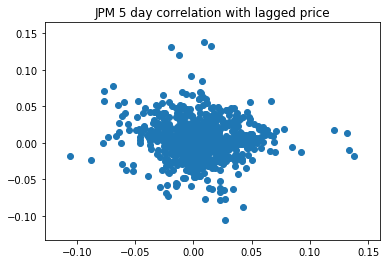

In [101]:
# Create 5-day % changes of Adj_Close for the current day, and 5 days in the future
df_price['5d_future_close'] = df_price['adj_close'].shift(-5)
df_price['5d_close_future_pct'] = df_price['5d_future_close'].pct_change(5)
df_price['5d_close_pct'] = df_price['adj_close'].pct_change(5)

# Calculate the correlation matrix between the 5d close pecentage changes (current and future)
corr = df_price[['5d_close_pct', '5d_close_future_pct']].corr()
print(corr)

# Scatter the current 5-day percent change vs the future 5-day percent change
plt.title('JPM 5 day correlation with lagged price')
plt.scatter(df_price['5d_close_pct'], df_price['5d_close_future_pct'])
plt.show()

                     compound  5d_close_future_pct
compound             1.000000            -0.076991
5d_close_future_pct -0.076991             1.000000


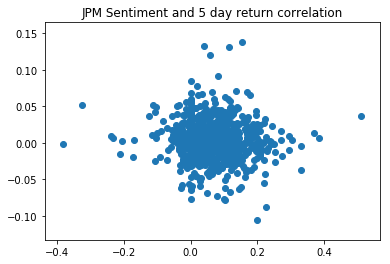

In [102]:
# Calculate the correlation matrix between the 5d close pecentage changes (current and future)
corr = df_price[['compound', '5d_close_future_pct']].corr()
print(corr)

# Scatter the current 5-day percent change vs the future 5-day percent change
plt.title('JPM Sentiment and 5 day return correlation')
plt.scatter(df_price['compound'], df_price['5d_close_future_pct'])
plt.show()

                     1d_close_pct  1d_close_future_pct
1d_close_pct              1.00000              0.01317
1d_close_future_pct       0.01317              1.00000


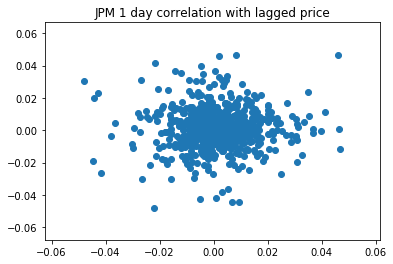

In [103]:
df_1 = df_price
# Create 5-day % changes of Adj_Close for the current day, and 5 days in the future
df_1['1d_future_close'] = df_1['adj_close'].shift(-1)
df_1['1d_close_future_pct'] = df_1['1d_future_close'].pct_change(1)
df_1['1d_close_pct'] = df_1['adj_close'].pct_change(1)

# Calculate the correlation matrix between the 5d close pecentage changes (current and future)
corr = df_1[['1d_close_pct', '1d_close_future_pct']].corr()
print(corr)
# Scatter the current 5-day percent change vs the future 5-day percent change
plt.title('JPM 1 day correlation with lagged price')
plt.scatter(df_1['1d_close_pct'], df_1['1d_close_future_pct'])
plt.show()

                     compound  1d_close_future_pct
compound             1.000000            -0.060528
1d_close_future_pct -0.060528             1.000000


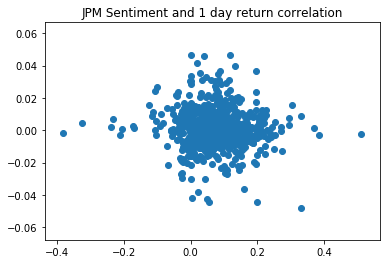

In [104]:
# Calculate the correlation matrix between the 5d close pecentage changes (current and future)
corr = df_1[['compound', '1d_close_future_pct']].corr()
print(corr)

# Scatter the current 5-day percent change vs the future 5-day percent change
plt.title('JPM Sentiment and 1 day return correlation')
plt.scatter(df_1['compound'], df_1['1d_close_future_pct'])
plt.show()

                      30d_close_pct  30d_close_future_pct
30d_close_pct               1.00000              -0.06779
30d_close_future_pct       -0.06779               1.00000


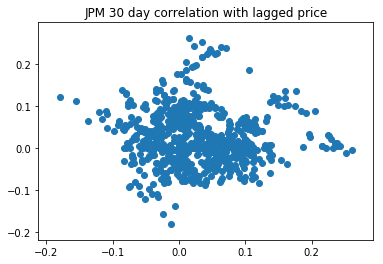

In [105]:
# Create 5-day % changes of Adj_Close for the current day, and 5 days in the future
df_30 = df_price
df_30['30d_future_close'] = df_price['adj_close'].shift(-30)
df_30['30d_close_future_pct'] = df_price['30d_future_close'].pct_change(30)
df_30['30d_close_pct'] = df_price['adj_close'].pct_change(30)

# Calculate the correlation matrix between the 5d close pecentage changes (current and future)
corr = df_30[['30d_close_pct', '30d_close_future_pct']].corr()
print(corr)
# Scatter the current 30-day percent change vs the future 5-day percent change
plt.title('JPM 30 day correlation with lagged price')
plt.scatter(df_30['30d_close_pct'], df_30['30d_close_future_pct'])
plt.show()

                      compound  30d_close_future_pct
compound               1.00000              -0.07011
30d_close_future_pct  -0.07011               1.00000


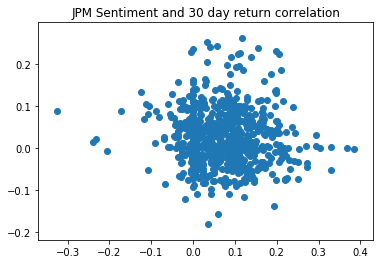

In [106]:
# Calculate the correlation matrix between the 5d close pecentage changes (current and future)
corr = df_30[['compound', '30d_close_future_pct']].corr()
print(corr)

# Scatter the current 5-day percent change vs the future 5-day percent change
plt.title('JPM Sentiment and 30 day return correlation')
plt.scatter(df_30['compound'], df_30['30d_close_future_pct'])
plt.show()

In [107]:
df_price = df_price.drop(['Unnamed: 0'], axis =1)

In [108]:
df_price.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 782 entries, 2016-07-01 to 2019-05-27
Data columns (total 62 columns):
adj_close                         754 non-null float64
adj_high                          754 non-null float64
adj_low                           754 non-null float64
adj_open                          754 non-null float64
adj_volume                        754 non-null float64
close                             754 non-null float64
date                              782 non-null datetime64[ns]
frequency                         754 non-null object
high                              754 non-null float64
intraperiod                       754 non-null object
low                               754 non-null float64
open                              754 non-null float64
volume                            754 non-null float64
ma14                              754 non-null float64
rsi14                             754 non-null float64
ma30                              754 non-null

In [109]:
#df_price['MACD'] = pd.Series(talib.MACD(df_price['adj_close'], fastperiod=12, slowperiod=26, signalperiod=9))
#df_price['STOCH'] = pd.Series(talib.STOCH(df_price['adj_high'].values,df_price['adj_low'].values,df_price['adj_close'].values,fastk_period=5, slowk_period=3, slowk_matype=0, slowd_period=3, slowd_matype=0))

In [110]:
#df_price[:50]

#df_price.drop(['MACD','STOCH'], axis =1)

In [111]:
feature_names = ['30d_close_pct']  # a list of the feature names for later

# Create moving averages and rsi for timeperiods of 14, 30, 50, and 200
for n in [14, 30, 50, 200]:
    
# Add rsi and moving average to the feature name list
    feature_names = feature_names + ['ma' + str(n), 'rsi' + str(n)]

    

        

feature_names = feature_names + ['compound'] + fundamentals
print(feature_names)



['30d_close_pct', 'ma14', 'rsi14', 'ma30', 'rsi30', 'ma50', 'rsi50', 'ma200', 'rsi200', 'compound', 'marketcap', 'pricetobook', 'pricetoearnings', 'dividendyield', 'earningsyield', 'nopat', 'freecashflow', 'roe', 'ebitdagrowth', 'ebitdamargin', 'cashdividendspershare', 'bookvaluepershare', 'debttoequity', 'epsgrowth', 'investedcapitalgrowth', 'fcffgrowth', 'finleverage', 'netincomegrowth', 'roa', 'revenuegrowth', 'basiceps', 'ebitda', 'totalassets', 'totalliabilities', 'debt', 'netincome', 'netcashfromoperatingactivities', 'netcashfrominvestingactivities', 'netcashfromfinancingactivities', 'longterminvestments', 'one_yr_monthly_beta']


In [112]:
# Create 2 new volume features, 1-day % change and 5-day SMA of the % change
new_features = ['Adj_Volume_1d_change', 'Adj_Volume_1d_change_SMA']
feature_names.extend(new_features)
df_price['Adj_Volume_1d_change'] = df_price['adj_volume'].pct_change()
df_price['Adj_Volume_1d_change_SMA'] = talib.SMA(df_price['Adj_Volume_1d_change'].values,
                                               timeperiod=5)


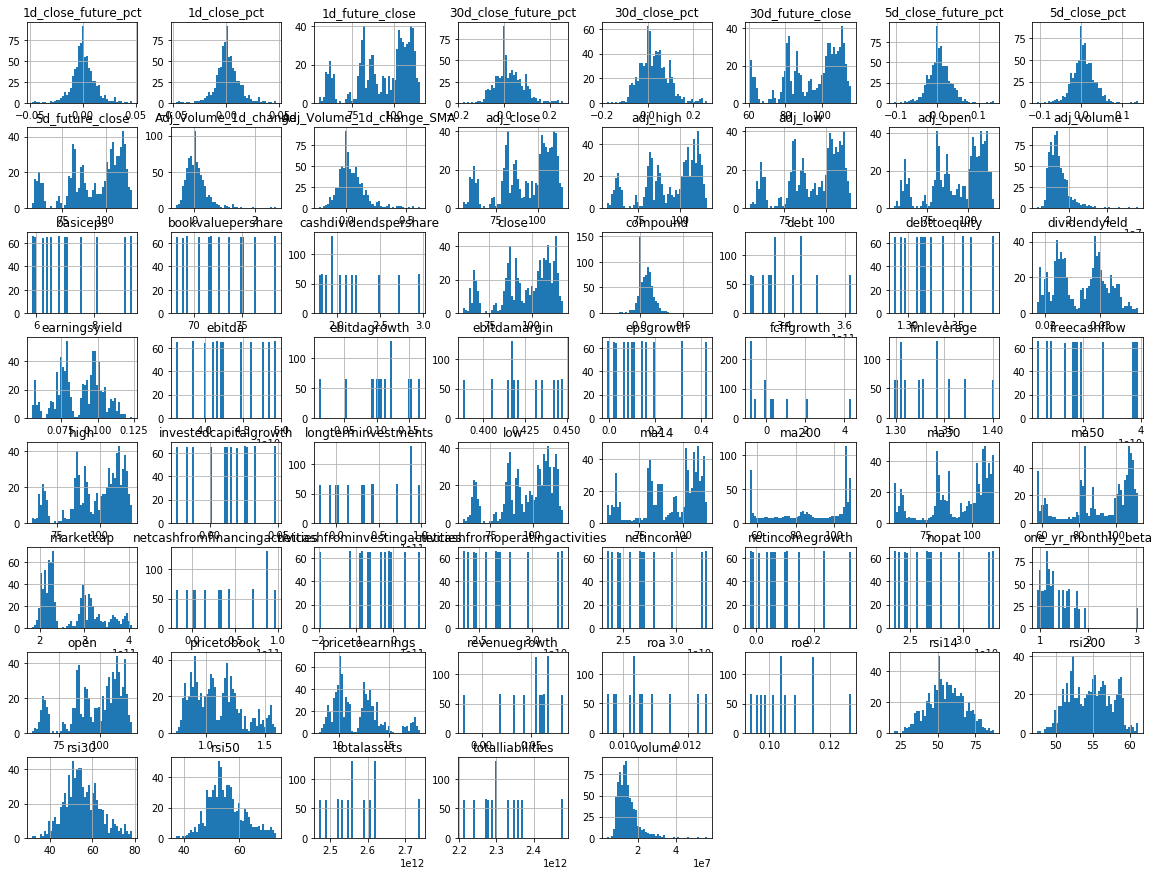

In [113]:
%matplotlib inline
import matplotlib.pyplot as plt
df_price.hist(bins=50, figsize=(20,15))
plt.show()

In [114]:
df_price.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 782 entries, 2016-07-01 to 2019-05-27
Data columns (total 64 columns):
adj_close                         754 non-null float64
adj_high                          754 non-null float64
adj_low                           754 non-null float64
adj_open                          754 non-null float64
adj_volume                        754 non-null float64
close                             754 non-null float64
date                              782 non-null datetime64[ns]
frequency                         754 non-null object
high                              754 non-null float64
intraperiod                       754 non-null object
low                               754 non-null float64
open                              754 non-null float64
volume                            754 non-null float64
ma14                              754 non-null float64
rsi14                             754 non-null float64
ma30                              754 non-null

In [115]:
df_price.columns

Index(['adj_close', 'adj_high', 'adj_low', 'adj_open', 'adj_volume', 'close',
       'date', 'frequency', 'high', 'intraperiod', 'low', 'open', 'volume',
       'ma14', 'rsi14', 'ma30', 'rsi30', 'ma50', 'rsi50', 'ma200', 'rsi200',
       'compound', 'marketcap', 'pricetobook', 'pricetoearnings',
       'dividendyield', 'earningsyield', 'nopat', 'freecashflow', 'roe',
       'ebitdagrowth', 'ebitdamargin', 'cashdividendspershare',
       'bookvaluepershare', 'debttoequity', 'epsgrowth',
       'investedcapitalgrowth', 'fcffgrowth', 'finleverage', 'netincomegrowth',
       'roa', 'revenuegrowth', 'basiceps', 'ebitda', 'totalassets',
       'totalliabilities', 'debt', 'netincome',
       'netcashfromoperatingactivities', 'netcashfrominvestingactivities',
       'netcashfromfinancingactivities', 'longterminvestments',
       'one_yr_monthly_beta', '5d_future_close', '5d_close_future_pct',
       '5d_close_pct', '1d_future_close', '1d_close_future_pct',
       '1d_close_pct', '30d_future_cl

In [116]:
# Drop all na values
df_price = df_price.dropna()

# Create features and targets
# use feature_names for features; 5d_close_future_pct for targets
features = df_price[feature_names]
targets = df_price['30d_close_future_pct']

# Create DataFrame from target column and feature columns
feat_targ_df = df_price[['30d_close_future_pct'] + feature_names]

# Calculate correlation matrix
corr = feat_targ_df.corr()
print(corr)

                                30d_close_future_pct  30d_close_pct      ma14  \
30d_close_future_pct                        1.000000      -0.058470 -0.476366   
30d_close_pct                              -0.058470       1.000000 -0.196257   
ma14                                       -0.476366      -0.196257  1.000000   
rsi14                                      -0.062860       0.811492 -0.249105   
ma30                                       -0.457302      -0.295181  0.992499   
rsi30                                      -0.014069       0.870222 -0.311061   
ma50                                       -0.451923      -0.353951  0.981403   
rsi50                                      -0.014371       0.810022 -0.339171   
ma200                                      -0.370170      -0.349731  0.925112   
rsi200                                     -0.147106       0.506727 -0.098869   
compound                                   -0.066637       0.076507 -0.100641   
marketcap                   

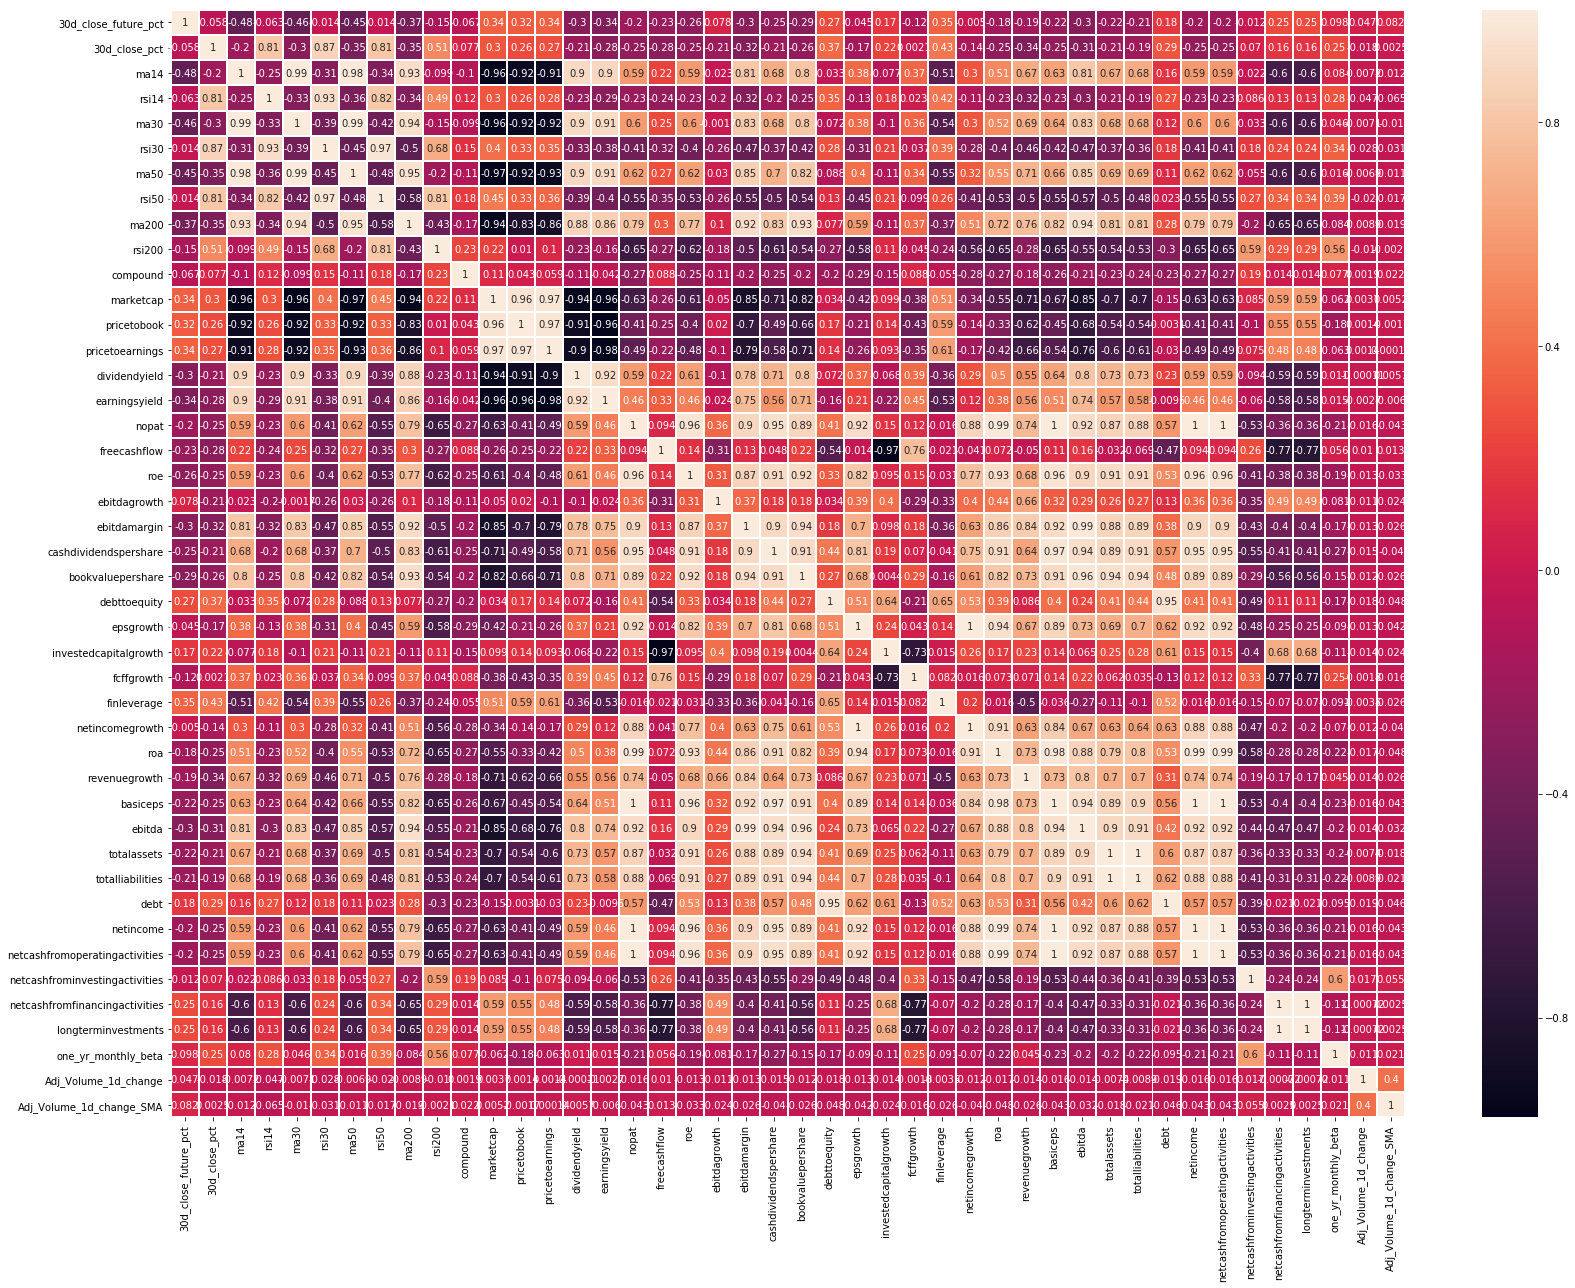

<Figure size 432x288 with 0 Axes>

In [117]:
# Plot heatmap of correlation matrix
plt.figure(figsize=(24, 18))
sns.heatmap(corr, annot=True,linewidths=1)
plt.yticks(rotation=0); plt.xticks(rotation=90)  # fix ticklabel directions
plt.tight_layout()  # fits plot area to the plot, "tightly"
plt.show()  # show the plot
plt.clf()  # clear the plot area

# Create a scatter plot of the most highly correlated variable with the target
#plt.scatter(df_price['ma200'], df_price['5d_close_future_pct'])
#plt.show()

In [118]:
# Calculate the correlation matrix and take the absolute value
corr_matrix = df_price.corr().abs()

# Create a True/False mask and apply it
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
tri_df = corr_matrix.mask(mask)

# List column names of highly correlated features (r > 0.95)
to_drop = [c for c in tri_df.columns if any(tri_df[c] > 0.90)]

# Drop the features in the to_drop list
reduced_df = df_price.drop(to_drop, axis=1)

print("The reduced_df dataframe has {} columns".format(reduced_df.shape[1]))

The reduced_df dataframe has 28 columns


In [119]:
reduced_df.columns

Index(['date', 'frequency', 'intraperiod', 'volume', 'rsi50', 'rsi200',
       'compound', 'earningsyield', 'ebitdagrowth', 'investedcapitalgrowth',
       'fcffgrowth', 'finleverage', 'revenuegrowth', 'totalliabilities',
       'debt', 'netcashfromoperatingactivities',
       'netcashfrominvestingactivities', 'longterminvestments',
       'one_yr_monthly_beta', '5d_close_future_pct', '5d_close_pct',
       '1d_close_future_pct', '1d_close_pct', '30d_future_close',
       '30d_close_future_pct', '30d_close_pct', 'Adj_Volume_1d_change',
       'Adj_Volume_1d_change_SMA'],
      dtype='object')

In [120]:
feature_names=['volume', 'ma14', 'rsi50', 'ma200',
       'rsi200', 'compound',
       'pricetobook', 'dividendyield', 'freecashflow', 'capex',
       'currentratio', 'debttoequity', 'investedcapitalgrowth', 'fcffgrowth',
       'finleverage', 'netincomegrowth', 'roa', 'revenuegrowth',
       'operatingrevenue', 'netincome', 'netcashfromoperatingactivities',
       'netcashfromfinancingactivities', 'longterminvestments',
       'one_yr_monthly_beta',
       '5d_close_pct', 'Adj_Volume_1d_change', 'Adj_Volume_1d_change_SMA']

In [121]:
feature_names = ['compound',
       'marketcap', 'pricetobook', 'dividendyield', 'earningsyield',
       'ebitdamargin', 'cashdividendspershare', 'bookvaluepershare',
       'currentratio', 'debttoequity', 'fcffgrowth', 'finleverage',
       'revenuegrowth', 'operatingrevenue', 'ebitda', 'totalassets', 'debt',
       'netincome', 'netcashfromoperatingactivities',
       'netcashfrominvestingactivities', 'netcashfromfinancingactivities',
       'longterminvestments', 'one_yr_monthly_beta', '5d_close_pct', 'ma14', 'ma30', 'ma50', 'rsi50',
       'ma200', 'rsi200', 'Adj_Volume_1d_change', 'Adj_Volume_1d_change_SMA']

In [126]:
#30 day future return features
feature_names = ['compound',
       'marketcap', 'pricetobook', 'dividendyield', 'earningsyield',
       'ebitdamargin', 'cashdividendspershare', 'bookvaluepershare',
       'debttoequity', 'fcffgrowth', 'finleverage',
       'revenuegrowth', 'ebitda', 'totalassets', 'debt',
       'netincome', 'netcashfromoperatingactivities',
       'netcashfrominvestingactivities', 'netcashfromfinancingactivities',
       'longterminvestments', 'one_yr_monthly_beta', '30d_close_pct', 'ma14', 'ma30', 'ma50', 'rsi50',
       'ma200', 'rsi200', 'Adj_Volume_1d_change', 'Adj_Volume_1d_change_SMA']

In [127]:
#feature_names = ['5d_close_pct', 'ma14','ma50', 'rsi50', 'ma200', 'rsi200', 'compound', 'pricetobook', 'pricetoearnings', 'dividendyield', 'earningsyield']
#feature_names = ['compound']
features = df_price[feature_names]
targets = reduced_df['30d_close_future_pct']





In [128]:
targets.describe()

count    694.000000
mean       0.026910
std        0.066636
min       -0.180103
25%       -0.017873
50%        0.015959
75%        0.068315
max        0.260773
Name: 30d_close_future_pct, dtype: float64

In [129]:
# Import the statsmodels library with the alias sm
import statsmodels.api as sm

# Add a constant to the features
linear_features = sm.add_constant(features)

# Create a size for the training set that is 85% of the total number of samples
train_size = int(0.80 * features.shape[0])
train_features = linear_features[:train_size]
train_targets = targets[:train_size]
test_features = linear_features[train_size:len(targets)]
test_targets = targets[train_size:len(targets)]
print(linear_features.shape, train_features.shape, test_features.shape)
print(linear_features.shape, train_features.shape, test_features.shape)

(694, 31) (555, 31) (139, 31)
(694, 31) (555, 31) (139, 31)


In [130]:
train_size

555

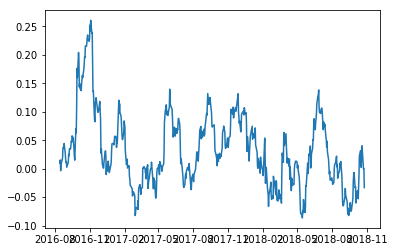

In [131]:
plt.plot(train_targets)

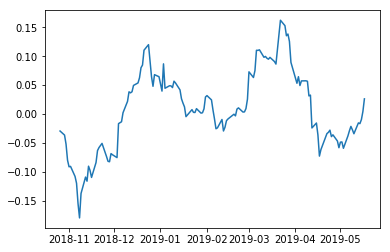

In [132]:
plt.plot(test_targets)

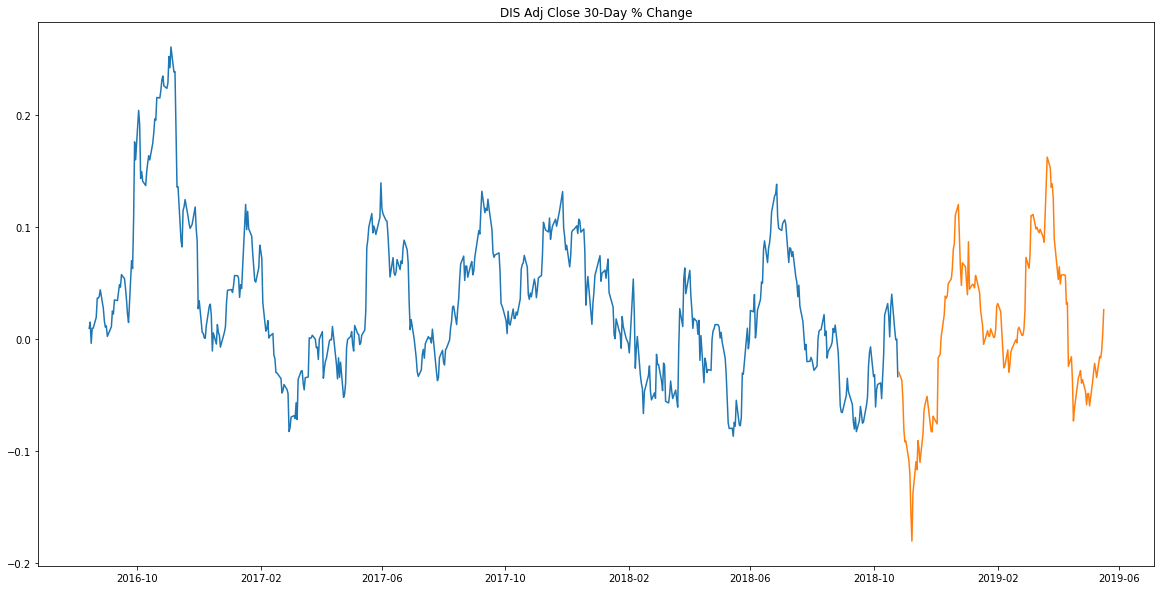

In [133]:
plt.figure(figsize=(20,10))
plt.plot(train_targets)
plt.plot(test_targets)
plt.title('DIS Adj Close 30-Day % Change')
plt.show()

In [135]:
# Create the linear model and complete the least squares fit
model = sm.OLS(train_targets, train_features)
results = model.fit()  # fit the model
print(results.summary())

# examine pvalues
# Features with p <= 0.05 are typically considered significantly different from 0
print(results.pvalues)

# Make predictions from our model for train and test sets
train_predictions = results.predict(train_features)
test_predictions = results.predict(test_features)

                             OLS Regression Results                             
Dep. Variable:     30d_close_future_pct   R-squared:                       0.804
Model:                              OLS   Adj. R-squared:                  0.797
Method:                   Least Squares   F-statistic:                     115.4
Date:                  Sun, 01 Sep 2019   Prob (F-statistic):          3.63e-175
Time:                          13:45:33   Log-Likelihood:                 1179.6
No. Observations:                   555   AIC:                            -2319.
Df Residuals:                       535   BIC:                            -2233.
Df Model:                            19                                         
Covariance Type:              nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------

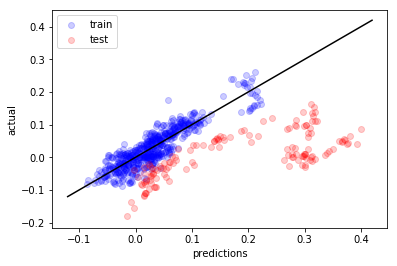

In [136]:
# Scatter the predictions vs the targets with 80% transparency
plt.scatter(train_predictions, train_targets, alpha=0.2, color='b', label='train')
plt.scatter(test_predictions, test_targets, alpha= 0.2, color='r', label='test')

# Plot the perfect prediction line
xmin, xmax = plt.xlim()
plt.plot(np.arange(xmin, xmax, 0.01), np.arange(xmin, xmax, 0.01), c='k')

# Set the axis labels and show the plot
plt.xlabel('predictions')
plt.ylabel('actual')
plt.legend()  # show the legend
plt.show()

In [137]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
# scikit-learn:
lr = LinearRegression()
lr.fit(train_features, train_targets)

# Make predictions with our model
train_predictions = lr.predict(train_features)
test_predictions = lr.predict(test_features)

# Create a scatter plot with train and test actual vs predictions
#plt.scatter(train_targets, train_predictions, label='train')
#plt.scatter(test_targets, test_predictions, label='test')
#plt.legend()
#plt.show()

In [138]:
# Look at the R^2 scores on train and test
print(lr.score(train_features, train_targets))
print(lr.score(test_features, test_targets))

0.8138592209981057
-13.558592481324553


In [139]:
print(mean_squared_error(train_targets, train_predictions))
print(mean_squared_error(test_targets, test_predictions))


0.0007922194603057869
0.06828517783657569


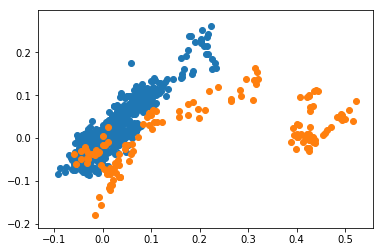

In [140]:
# Scatter the predictions vs actual values
plt.scatter(train_predictions, train_targets, label='train')
plt.scatter(test_predictions, test_targets, label='test')
plt.show()

In [141]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [142]:
scaler = StandardScaler()


scaled_train_features = scaler.fit_transform(train_features)
scaled_test_features = scaler.fit_transform(test_features)

print(linear_features.shape, scaled_train_features.shape, scaled_test_features.shape)
print(linear_features.shape, scaled_train_features.shape, scaled_test_features.shape)

(694, 31) (555, 31) (139, 31)
(694, 31) (555, 31) (139, 31)


In [143]:
# scikit-learn:
lr = LinearRegression()
lr.fit(scaled_train_features, train_targets)

# Make predictions with our model
train_predictions = lr.predict(scaled_train_features)
test_predictions = lr.predict(scaled_test_features)

# Create a scatter plot with train and test actual vs predictions
#plt.scatter(train_targets, train_predictions, label='train')
#plt.scatter(test_targets, test_predictions, label='test')
#plt.legend()
#plt.show()b

In [146]:
# Look at the R^2 scores on train and test
print(lr.score(scaled_train_features, train_targets))
print(lr.score(scaled_test_features, test_targets))

0.8138605508961861
-8.019942832628594


In [147]:
print(mean_squared_error(train_targets, train_predictions))
print(mean_squared_error(test_targets, test_predictions))
rsme_train = np.sqrt(mean_squared_error(train_targets, train_predictions))
rsme_test = np.sqrt(mean_squared_error(test_targets, test_predictions))
print('Train Root mean squared error: ' + str(rsme_train))
print('Test Root mean squared error: ' + str(rsme_test))

0.0007922138002288004
0.0423068645675665
Train Root mean squared error: 0.02814629283278351
Test Root mean squared error: 0.20568632566985706


In [148]:
column =['Prediction']
test= pd.DataFrame(test_predictions,columns=column,index=test_targets.index)
#test

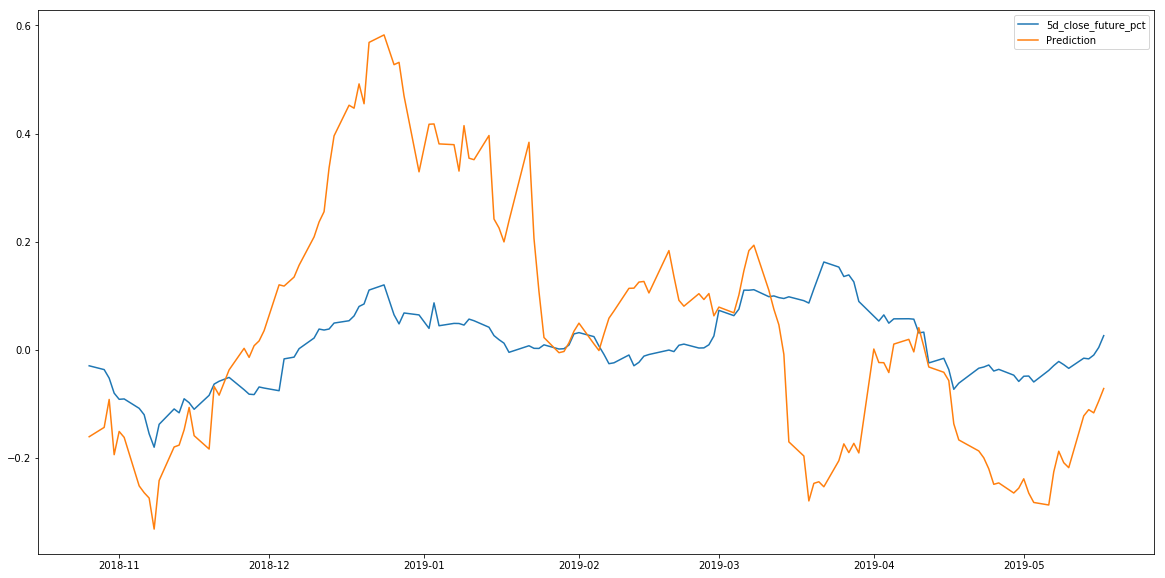

In [149]:
plt.figure(figsize=(20,10))
plt.plot(test_targets)
plt.plot(test)
plt.legend(['5d_close_future_pct','Prediction'])
plt.show()

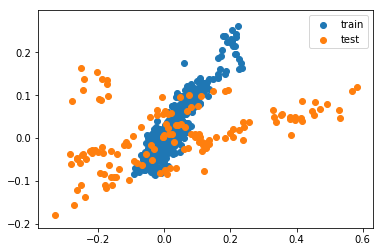

In [150]:
# Scatter the predictions vs actual values
plt.scatter(train_predictions, train_targets, label='train')
plt.scatter(test_predictions, test_targets, label='test')
plt.legend()
plt.show()

### Lasso And Ridge - https://www.analyticsvidhya.com/blog/2017/06/a-comprehensive-guide-for-linear-ridge-and-lasso-regression/

In [151]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
scaler = StandardScaler()
# Fit the scaler on the training features and transform these in one go
scaled_train_features = scaler.fit_transform(train_features)

# Create the Lasso model 
la = Lasso()

# Fit it to the standardized training data
la.fit(scaled_train_features, train_targets)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [152]:
# Transform the test set with the pre-fitted scaler
scaled_test_features = scaler.transform(test_features)

# Calculate the coefficient of determination (R squared) on X_test_std
r_squared = la.score(scaled_test_features, test_targets)
print("The model can predict {0:.1%} of the variance in the test set.".format(r_squared))

# Create a list that has True values when coefficients equal 0
zero_coef = la.coef_ == 0

# Calculate how many features have a zero coefficient
n_ignored = sum(zero_coef)
print("The model has ignored {} out of {} features.".format(n_ignored, len(la.coef_)))

The model can predict -12.1% of the variance in the test set.
The model has ignored 31 out of 31 features.


In [153]:
from sklearn.linear_model import Lasso

lassoReg = Lasso(alpha=0.01,normalize=True)

lassoReg.fit(train_features, train_targets)

pred = lassoReg.predict(test_features)
train_pred= lassoReg.predict(train_features)

train_score = r2_score(train_targets, train_pred)
score = r2_score(test_targets, pred)
mse = mean_squared_error(test_targets, test_predictions)

print(train_score)
print(score)
print(mse)
print(np.sqrt(mse))

0.0
-0.12113313066673426
0.0423068645675665
0.20568632566985706


In [155]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
# prepare a range of alpha values to test
alphas = np.array([5,4,3,2,1,0.1,0.01,0.001,0.0001,0])
# create and fit a ridge regression model, testing each alpha
model = Ridge(normalize=True)
grid = GridSearchCV(estimator=model, param_grid=dict(alpha=alphas))
grid.fit(train_features, train_targets)
print(grid)
# summarize the results of the grid search
print(grid.best_score_)
print(grid.best_estimator_.alpha)

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': array([5.e+00, 4.e+00, 3.e+00, 2.e+00, 1.e+00, 1.e-01, 1.e-02, 1.e-03,
       1.e-04, 0.e+00])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)
-0.5809510636739283
5.0


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


In [157]:

alphas = np.array([20,10,5,4,3,2,1.5,1,0.5,0.1,0.01,0.001,0.0001,0])
test_scores=[]
train_scores=[]

for n in alphas:
    ridgeReg = Ridge(alpha=n, normalize=True)
    ridgeReg.fit(train_features, train_targets)
    pred = ridgeReg.predict(test_features)
    train_pred= ridgeReg.predict(train_features)
    train_score = r2_score(train_targets, train_pred)
    train_scores.append(train_score)
    score = r2_score(test_targets, pred)
    test_scores.append(score)
ridge=pd.DataFrame(data=test_scores, index=alphas)

ridge


,0
20.0000,1.457456e-02
10.0000,6.098595e-02
5.0000,1.064843e-01
4.0000,1.196818e-01
3.0000,1.351469e-01
2.0000,1.550036e-01
1.5000,1.696807e-01
1.0000,1.947292e-01
0.5000,2.498673e-01
0.1000,2.368745e-01


In [160]:
from sklearn.linear_model import Ridge



ridgeReg = Ridge(alpha=0.5, normalize=True)

ridgeReg.fit(train_features, train_targets)

pred = ridgeReg.predict(test_features)
train_pred= ridgeReg.predict(train_features)

train_score = r2_score(train_targets, train_pred)
score = r2_score(test_targets, pred)
mse = mean_squared_error(test_targets, test_predictions)

print('Train r2: ' + str(train_score))
print('Test r2: ' + str(score))
#print(mse)
#print(np.sqrt(mse))

Train r2: 0.5237327452353705
Test r2: 0.24986726085544098


In [161]:
from sklearn.linear_model import ElasticNet

ENreg = ElasticNet(alpha=10, l1_ratio=1, normalize=False)

ENreg.fit(train_features,train_targets)

pred_cv = ENreg.predict(test_features)
train_pred= ENreg.predict(train_features)

train_score = r2_score(train_targets, train_pred)
score = r2_score(test_targets, pred)
mse = mean_squared_error(test_targets, test_predictions)

print('Train r2: ' + str(train_score))
print('Test r2: ' + str(score))
#print(mse)
#print(np.sqrt(mse))

Train r2: 0.2642046068868277
Test r2: 0.24986726085544098


### PLS - https://www.idtools.com.au/partial-least-squares-regression-python/

In [162]:
#S basic codePython
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define PLS object
pls = PLSRegression(n_components=3,scale=True)

# Fit
pls.fit(train_features, train_targets)

# Prediction
train_predicitions = pls.predict(train_features)
test_predicitions = pls.predict(test_features)

# Calculate scores
train_score = r2_score(train_targets,train_predictions)
score = r2_score(test_targets, test_predictions)
mse = mean_squared_error(test_targets, test_predictions)

print('Train r2: ' + str(train_score))
print('Test r2: ' + str(score))
print(mse)
print(np.sqrt(mse))


Train r2: 0.8138605508961861
Test r2: -8.019942832628594
0.0423068645675665
0.20568632566985706


In [163]:
from sys import stdout
 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
 
from scipy.signal import savgol_filter
 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cross_decomposition import PLSRegression
from sklearn import model_selection
from sklearn.metrics import mean_squared_error, r2_score

In [164]:
X_calib = scaled_train_features
Y_calib = train_targets
X_valid = scaled_test_features
Y_valid = test_targets

def prediction(X_calib, Y_calib, X_valid, Y_valid, plot_components=False):
 
    #Run PLS including a variable number of components, up to 40,  and calculate MSE
    mse = []
    component = np.arange(1, 29)
    for i in component:
        pls = PLSRegression(n_components=i)
        # Fit
        pls.fit(X_calib, Y_calib)
        # Prediction
        Y_pred = pls.predict(X_valid)
 
        mse_p = mean_squared_error(Y_valid, Y_pred)
        mse.append(mse_p)
 
        comp = 100*(i+1)/40
        # Trick to update status on the same line
        stdout.write("\r%d%% completed" % comp)
        stdout.flush()
    stdout.write("\n")
 
    # Calculate and print the position of minimum in MSE
    msemin = np.argmin(mse)
    print("Suggested number of components: ", msemin+1)
    stdout.write("\n")
 
    if plot_components is True:
        with plt.style.context(('ggplot')):
            plt.plot(component, np.array(mse), '-v', color = 'blue', mfc='blue')
            plt.plot(component[msemin], np.array(mse)[msemin], 'P', ms=10, mfc='red')
            plt.xlabel('Number of PLS components')
            plt.ylabel('MSE')
            plt.title('PLS')
            plt.xlim(xmin=-1)
 
        plt.show()
    # Run PLS with suggested number of components
    pls = PLSRegression(n_components=msemin+1)
    pls.fit(train_features, Y_calib)
    Y_pred = pls.predict(X_valid) 
    
    # Calculate and print scores
    score_p = r2_score(Y_valid, Y_pred)
    mse_p = mean_squared_error(Y_valid, Y_pred)
    sep = np.std(Y_pred[:,0]-Y_valid)
    rpd = np.std(Y_valid)/sep
    bias = np.mean(Y_pred[:,0]-Y_valid)
    
    print('R2: %5.3f'  % score_p)
    print('MSE: %5.3f' % mse_p)
    print('SEP: %5.3f' % sep)
    print('RPD: %5.3f' % rpd)
    print('Bias: %5.3f' %  bias)
 
    # Plot regression and figures of merit
    rangey = max(Y_valid) - min(Y_valid)
    rangex = max(Y_pred) - min(Y_pred)
 
    z = np.polyfit(Y_valid, Y_pred, 1)
    with plt.style.context(('ggplot')):
        fig, ax = plt.subplots(figsize=(9, 5))
        ax.scatter(Y_pred, Y_valid, c='red', edgecolors='k')
        ax.plot(z[1]+z[0]*Y_valid, Y_valid, c='blue', linewidth=1)
        ax.plot(Y_valid, Y_valid, color='green', linewidth=1)
        plt.xlabel('Predicted')
        plt.ylabel('Measured')
        plt.title('Prediction')
 
        # Print the scores on the plot
        plt.text(min(Y_pred)+0.05*rangex, max(Y_valid)-0.1*rangey, 'R$^{2}=$ %5.3f'  % score_p)
        plt.text(min(Y_pred)+0.05*rangex, max(Y_valid)-0.15*rangey, 'MSE: %5.3f' % mse_p)
        plt.text(min(Y_pred)+0.05*rangex, max(Y_valid)-0.2*rangey, 'SEP: %5.3f' % sep)
        plt.text(min(Y_pred)+0.05*rangex, max(Y_valid)-0.25*rangey, 'RPD: %5.3f' % rpd)
        plt.text(min(Y_pred)+0.05*rangex, max(Y_valid)-0.3*rangey, 'Bias: %5.3f' %  bias)
        plt.show()

72% completed
Suggested number of components:  5

R2: -6057.673
MSE: 28.417
SEP: 2.102
RPD: 0.033
Bias: 4.899


/anaconda3/lib/python3.6/site-packages/sklearn/cross_decomposition/pls_.py:317: UserWarning: X scores are null at iteration 24
  warnings.warn('X scores are null at iteration %s' % k)
/anaconda3/lib/python3.6/site-packages/sklearn/cross_decomposition/pls_.py:317: UserWarning: X scores are null at iteration 24
  warnings.warn('X scores are null at iteration %s' % k)
/anaconda3/lib/python3.6/site-packages/sklearn/cross_decomposition/pls_.py:317: UserWarning: X scores are null at iteration 24
  warnings.warn('X scores are null at iteration %s' % k)
/anaconda3/lib/python3.6/site-packages/sklearn/cross_decomposition/pls_.py:317: UserWarning: X scores are null at iteration 24
  warnings.warn('X scores are null at iteration %s' % k)


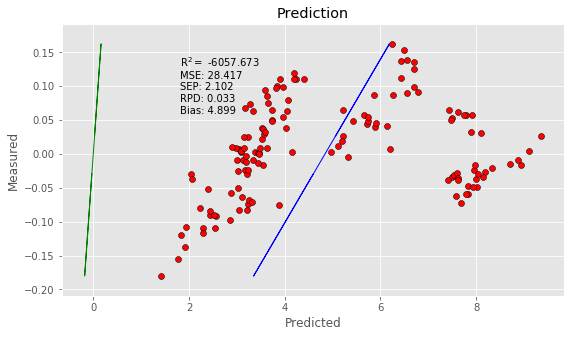

In [165]:
prediction(X_calib, Y_calib, X_valid, Y_valid, plot_components=False)

[51.86 62.72 71.93 78.44 83.52 88.16 91.55 94.22 96.24 97.52 98.5  99.17
 99.44 99.67 99.82 99.88 99.93 99.95 99.96 99.97 99.98 99.99 99.99 99.99
 99.99 99.99 99.99 99.99 99.99 99.99 99.99]
0.5550459694136807
-0.6150562217347446
0.007575210409845284
0.08703568469223003


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:176: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:176: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


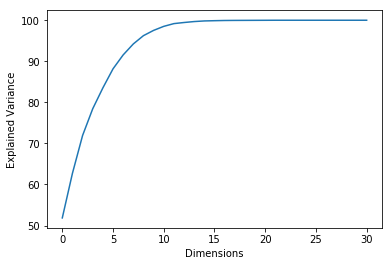

In [169]:
### PCA

import numpy as np
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
%matplotlib inline

#convert it to numpy arrays
X=train_features
X_test=test_features

#Scaling the values
X = scale(X)
X_test=scale(X_test)

pca = PCA(n_components=31)

pca.fit(X)

#The amount of variance that each PC explains
var= pca.explained_variance_ratio_



#Cumulative Variance explains
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

print(var1)

plt.plot(var1)
plt.xlabel('Dimensions')
plt.ylabel('Explained Variance')

#Looking at above plot I'm taking 30 variables
pca = PCA(n_components=10)
pca.fit(X)
X1=pca.fit_transform(X)
X1_test=pca.fit_transform(X_test)

from sklearn import linear_model
regr = linear_model.LinearRegression() 

y = train_targets
regr.fit(X1,y)
pred=regr.predict(X1)
y_pred=regr.predict(X1_test)


train_score = r2_score(train_targets, pred)
score = r2_score(test_targets, y_pred)
mse = mean_squared_error(test_targets, y_pred)

print(train_score)
print(score)
print(mse)
print(np.sqrt(mse))

### Decision Tree

In [170]:
from sklearn.tree import DecisionTreeRegressor

# Create a decision tree regression model with default arguments
decision_tree = DecisionTreeRegressor()

# Fit the model to the training features and targets
decision_tree.fit(train_features, train_targets)

# Check the score on train and test
print(decision_tree.score(train_features, train_targets))
print(decision_tree.score(test_features, test_targets))

0.9999984712268211
-2.634343803871801


In [171]:
#Scaled Data
from sklearn.tree import DecisionTreeRegressor

# Create a decision tree regression model with default arguments
decision_tree = DecisionTreeRegressor()

# Fit the model to the training features and targets
decision_tree.fit(scaled_train_features, train_targets)

# Check the score on train and test
print(decision_tree.score(scaled_train_features, train_targets))
print(decision_tree.score(scaled_test_features, test_targets))

0.9999984712268211
-0.5856585924127582


In [172]:
for d in [3,5,10]:
    # Create the tree and fit it
    decision_tree = DecisionTreeRegressor(max_depth=d,random_state=42)
    decision_tree.fit(train_features,train_targets)

    # Print out the scores on train and test
    print('max_depth=', str(d))
    print(decision_tree.score(train_features, train_targets))
    print(decision_tree.score(test_features, test_targets), '\n')

max_depth= 3
0.6831995943936622
-0.1409807683737374 

max_depth= 5
0.9164684386315162
-0.42108430450501433 

max_depth= 10
0.9936470855930751
-0.5930307734878906 



In [173]:
#Scaled Data
for d in [3,5,10]:
    # Create the tree and fit it
    decision_tree = DecisionTreeRegressor(max_depth=d,random_state=42)
    decision_tree.fit(train_features,train_targets)

    # Print out the scores on train and test
    print('max_depth=', str(d))
    print(decision_tree.score(scaled_train_features, train_targets))
    print(decision_tree.score(scaled_test_features, test_targets), '\n')

max_depth= 3
-6.4519822891906236
-7.659886737235263 

max_depth= 5
-4.088729368270266
-5.3141243889179 

max_depth= 10
-3.7550248262517707
-4.842337435711113 



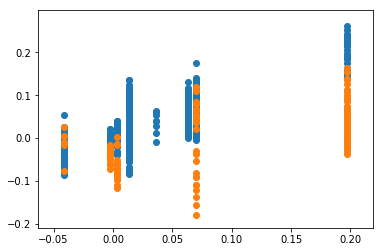

In [174]:
# Use the best max_depth of 3 from last exercise to fit a decision tree
decision_tree = DecisionTreeRegressor(max_depth=3)
decision_tree.fit(train_features, train_targets)

# Predict values for train and test
train_predictions = decision_tree.predict(train_features)
test_predictions = decision_tree.predict(test_features)

# Scatter the predictions vs actual values
plt.scatter(train_predictions, train_targets, label='train')
plt.scatter(test_predictions, test_targets, label='test')
plt.show()

### Random Forest

In [175]:
from sklearn.ensemble import RandomForestRegressor

# Create the random forest model and fit to the training data
rfr = RandomForestRegressor(n_estimators=200)
rfr.fit(train_features, train_targets)

# Look at the R^2 scores on train and test
print(rfr.score(train_features, train_targets))
print(rfr.score(test_features, test_targets))

0.9924141036788802
-0.747018622444243


Usually, we can use sklearn's GridSearchCV() method to search hyperparameters, but with a financial time series, we don't want to do cross-validation due to data mixing. We want to fit our models on the oldest data and evaluate on the newest data. So we'll use sklearn's ParameterGrid to create combinations of hyperparameters to search.

In [176]:
from sklearn.model_selection import ParameterGrid

# Create a dictionary of hyperparameters to search
grid = {'n_estimators':[200], 'max_depth': [3], 'max_features': [4,8], 'random_state': [42]}
test_scores = []

# Loop through the parameter grid, set the hyperparameters, and save the scores
for g in ParameterGrid(grid):
    rfr.set_params(**g)  # ** is "unpacking" the dictionary
    rfr.fit(train_features, train_targets)
    test_scores.append(rfr.score(test_features, test_targets))

# Find best hyperparameters from the test score and print
best_idx = np.argmax(test_scores)
print(test_scores[best_idx], ParameterGrid(grid)[best_idx])

0.09510645605425938 {'random_state': 42, 'n_estimators': 200, 'max_features': 4, 'max_depth': 3}


In [177]:
rfr = RandomForestRegressor(n_estimators=200,max_features=4,max_depth=3,random_state=42)
rfr.fit(train_features, train_targets)

# Look at the R^2 scores on train and test
print(rfr.score(train_features, train_targets))
print(rfr.score(test_features, test_targets))

0.7086453968889008
0.09510645605425938


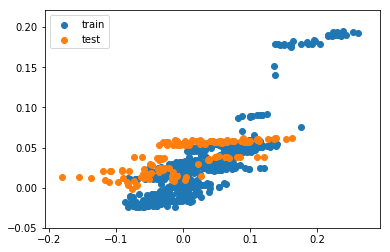

In [178]:
# Use the best hyperparameters from before to fit a random forest model
rfr = RandomForestRegressor(n_estimators=200, max_depth=3, max_features=4, random_state=42)
rfr.fit(train_features, train_targets)

# Make predictions with our model
train_predictions = rfr.predict(train_features)
test_predictions = rfr.predict(test_features)

# Create a scatter plot with train and test actual vs predictions
plt.scatter(train_targets, train_predictions, label='train')
plt.scatter(test_targets, test_predictions, label='test')
plt.legend()
plt.show()

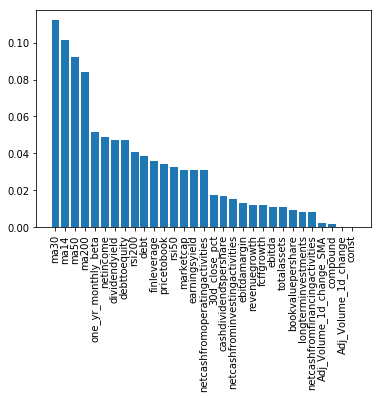

In [179]:
# Get feature importances from our random forest model
importances = rfr.feature_importances_

# Get the index of importances from greatest importance to least
sorted_index = np.argsort(importances)[::-1]
x = range(len(importances))
#x = range(features.shape)
# Create tick labels 
#labels = np.array(feature_names)[sorted_index]
labels = [linear_features.columns[i] for i in sorted_index]
plt.bar(x, importances[sorted_index], tick_label=labels)

# Rotate tick labels to vertical

plt.xticks(rotation=90)
plt.show()

In [180]:
from sklearn.ensemble import GradientBoostingRegressor

# Create GB model -- hyperparameters have already been searched for you
gbr = GradientBoostingRegressor(max_features=3,
                                learning_rate=0.01,
                                n_estimators=200,
                                subsample=0.6,
                                random_state=42)
gbr.fit(train_features,train_targets)

print(gbr.score(train_features, train_targets))
print(gbr.score(test_features,test_targets))

0.7711332161122932
0.04879517976333503


In [181]:
# Sort feature importances in descending order
#indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
#names = [iris.feature_names[i] for i in indices]

# Create plot
#plt.figure()

# Create plot title
#plt.title("Feature Importance")

# Add bars
#plt.bar(range(X.shape[1]), importances[indices])

# Add feature names as x-axis labels
#plt.xticks(range(X.shape[1]), names, rotation=90)

# Show plot
#plt.show()

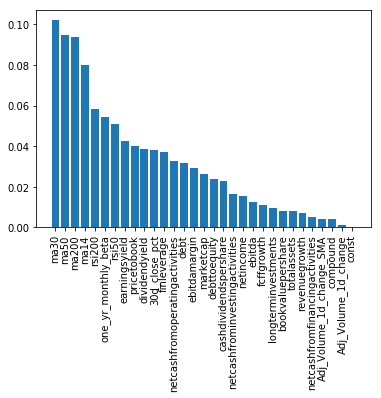

In [182]:
# Extract feature importances from the fitted gradient boosting model
feature_importances = gbr.feature_importances_

# Get the indices of the largest to smallest feature importances
sorted_index = np.argsort(feature_importances)[::-1]
x = range(len(feature_importances))

# Create tick labels 
#labels = np.array(feature_names)[sorted_index]
labels = [linear_features.columns[i] for i in sorted_index]
plt.bar(x, feature_importances[sorted_index], tick_label=labels)

# Set the tick lables to be the feature names, according to the sorted feature_idx
plt.xticks(rotation=90)
plt.show()

### K Nearest Neighbour

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:176: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:176: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


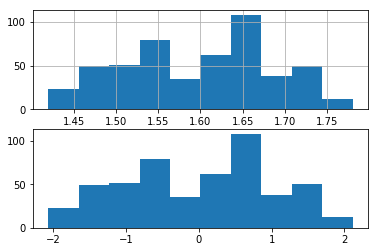

In [378]:


# Standardize the train and test features
scaled_train_features = scale(train_features)
scaled_test_features = scale(test_features)

# Plot histograms of the 14-day SMA RSI before and after scaling
f, ax = plt.subplots(nrows=2, ncols=1)
train_features.iloc[:, 2].hist(ax=ax[0])
ax[1].hist(scaled_train_features[:, 2])
plt.show()

In [379]:
from sklearn.neighbors import KNeighborsRegressor

for n in range(2, 20):
    # Create and fit the KNN model
    knn = KNeighborsRegressor(n_neighbors=n)
    
    # Fit the model to the training data
    knn.fit(scaled_train_features, train_targets)
    
    # Print number of neighbors and the score to find the best value of n
    print("n_neighbors =", n)
    print('train, test scores')
    print(knn.score(scaled_train_features, train_targets))
    print(knn.score(scaled_test_features, test_targets))
    print()  # prints a blank line

n_neighbors = 2
train, test scores
0.9317659576869242
-0.630399377849898

n_neighbors = 3
train, test scores
0.9090730896542718
-0.6260916395921101

n_neighbors = 4
train, test scores
0.8884637861778049
-0.5868726986966077

n_neighbors = 5
train, test scores
0.8721960533784154
-0.5890761762982011

n_neighbors = 6
train, test scores
0.8614490352746476
-0.5628634408443494

n_neighbors = 7
train, test scores
0.8506060115617263
-0.553120466332671

n_neighbors = 8
train, test scores
0.8391599435065195
-0.5466255704290381

n_neighbors = 9
train, test scores
0.8308651617575968
-0.5442418193721711

n_neighbors = 10
train, test scores
0.8245369898223559
-0.5366823813221224

n_neighbors = 11
train, test scores
0.8225269590619334
-0.5204910085552157

n_neighbors = 12
train, test scores
0.8171820266310599
-0.5180851705770195

n_neighbors = 13
train, test scores
0.8140928545513028
-0.5250102088459461

n_neighbors = 14
train, test scores
0.8088126290402509
-0.5182121523710597

n_neighbors = 15
train

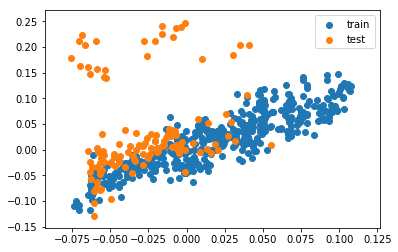

In [380]:
# Create the model with the best-performing n_neighbors of 5
knn = KNeighborsRegressor(n_neighbors=17)

# Fit the model
knn.fit(scaled_train_features, train_targets)

# Get predictions for train and test sets
train_predictions = knn.predict(scaled_train_features)
test_predictions = knn.predict(scaled_test_features)

# Plot the actual vs predicted values
plt.scatter(train_predictions, train_targets, label='train')
plt.scatter(test_predictions, test_targets, label='test')
plt.legend()
plt.show()

### Neural Network 

In [381]:
from keras.models import Sequential
from keras.layers import Dense

# Create the model
model_1 = Sequential()
model_1.add(Dense(100, input_dim=scaled_train_features.shape[1], activation='relu'))
model_1.add(Dense(20, activation='relu'))
model_1.add(Dense(1, activation='linear'))

# Fit the model
model_1.compile(optimizer='adam', loss='mse')
history = model_1.fit(scaled_train_features, train_targets, epochs=25)

Epoch 1/25
507/507 [==============================] - 0s 555us/step - loss: 0.1316
Epoch 2/25
507/507 [==============================] - 0s 24us/step - loss: 0.0191
Epoch 3/25
507/507 [==============================] - 0s 22us/step - loss: 0.0070
Epoch 4/25
507/507 [==============================] - 0s 21us/step - loss: 0.0046
Epoch 5/25
507/507 [==============================] - 0s 20us/step - loss: 0.0033
Epoch 6/25
507/507 [==============================] - 0s 21us/step - loss: 0.0025
Epoch 7/25
507/507 [==============================] - 0s 25us/step - loss: 0.0022
Epoch 8/25
507/507 [==============================] - 0s 29us/step - loss: 0.0020
Epoch 9/25
507/507 [==============================] - 0s 26us/step - loss: 0.0016
Epoch 10/25
507/507 [==============================] - 0s 23us/step - loss: 0.0014
Epoch 11/25
507/507 [==============================] - 0s 21us/step - loss: 0.0013
Epoch 12/25
507/507 [==============================] - 0s 27us/step - loss: 0.0011
Epoch 13/25


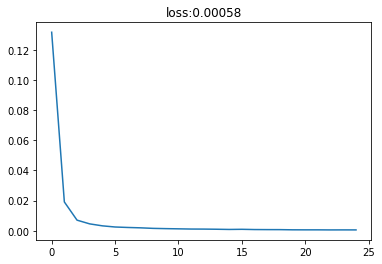

In [382]:
# Plot the losses from the fit
plt.plot(history.history['loss'])

# Use the last loss as the title
plt.title('loss:' + str(round(history.history['loss'][-1], 6)))
plt.show()

0.7934770929967104
-4.874692922616724


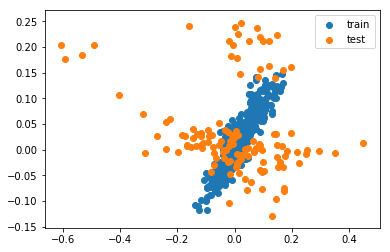

In [383]:
from sklearn.metrics import r2_score

# Calculate R^2 score
train_preds = model_1.predict(scaled_train_features)
test_preds = model_1.predict(scaled_test_features)
print(r2_score(train_targets, train_preds))
print(r2_score(test_targets, test_preds))

# Plot predictions vs actual
plt.scatter(train_preds, train_targets, label='train')
plt.scatter(test_preds,test_targets, label='test')
plt.legend()
plt.show()

In [384]:
import keras.losses
import tensorflow as tf

# Create loss function
def sign_penalty(y_true, y_pred):
    penalty = 100.
    loss = tf.where(tf.less(y_true * y_pred, 0), \
                     penalty * tf.square(y_true - y_pred), \
                     tf.square(y_true - y_pred))

    return tf.reduce_mean(loss, axis=-1)

keras.losses.sign_penalty = sign_penalty  # enable use of loss with keras
print(keras.losses.sign_penalty)

<function sign_penalty at 0x1c3fbfab70>


Epoch 1/25
507/507 [==============================] - 0s 474us/step - loss: 2.5723
Epoch 2/25
507/507 [==============================] - 0s 26us/step - loss: 0.2812
Epoch 3/25
507/507 [==============================] - 0s 27us/step - loss: 0.1442
Epoch 4/25
507/507 [==============================] - 0s 28us/step - loss: 0.0846
Epoch 5/25
507/507 [==============================] - 0s 25us/step - loss: 0.0643
Epoch 6/25
507/507 [==============================] - 0s 29us/step - loss: 0.0457
Epoch 7/25
507/507 [==============================] - 0s 25us/step - loss: 0.0350
Epoch 8/25
507/507 [==============================] - 0s 23us/step - loss: 0.0303
Epoch 9/25
507/507 [==============================] - 0s 28us/step - loss: 0.0362
Epoch 10/25
507/507 [==============================] - 0s 23us/step - loss: 0.0249
Epoch 11/25
507/507 [==============================] - 0s 25us/step - loss: 0.0260
Epoch 12/25
507/507 [==============================] - 0s 25us/step - loss: 0.0184
Epoch 13/25


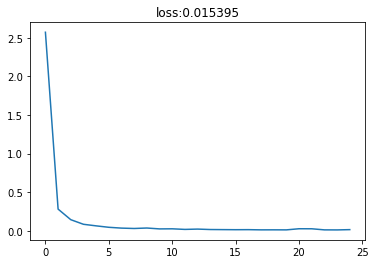

In [385]:
# Create the model
model_2 = Sequential()
model_2.add(Dense(100, input_dim=scaled_train_features.shape[1], activation='relu'))
model_2.add(Dense(20, activation='relu'))
model_2.add(Dense(1, activation='linear'))

# Fit the model with our custom 'sign_penalty' loss function
model_2.compile(optimizer='adam', loss=sign_penalty)
history = model_2.fit(scaled_train_features, train_targets, epochs=25)
plt.plot(history.history['loss'])
plt.title('loss:' + str(round(history.history['loss'][-1], 6)))
plt.show()

0.0075613526064625125
-2.933362662015907


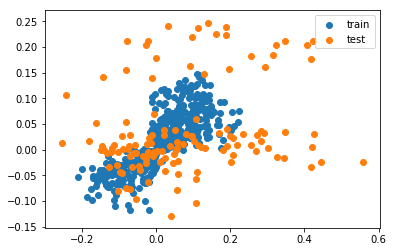

In [386]:
# Evaluate R^2 scores
train_preds = model_2.predict(scaled_train_features)
test_preds = model_2.predict(scaled_test_features)
print(r2_score(train_targets, train_preds))
print(r2_score(test_targets, test_preds))

# Scatter the predictions vs actual -- this one is interesting!
plt.scatter(train_preds, train_targets, label='train')
plt.scatter(test_preds, test_targets, label= 'test')  # plot test set
plt.legend(); plt.show()

Epoch 1/25
507/507 [==============================] - 0s 583us/step - loss: 0.1197
Epoch 2/25
507/507 [==============================] - 0s 23us/step - loss: 0.0762
Epoch 3/25
507/507 [==============================] - 0s 24us/step - loss: 0.0433
Epoch 4/25
507/507 [==============================] - 0s 28us/step - loss: 0.0308
Epoch 5/25
507/507 [==============================] - 0s 30us/step - loss: 0.0249
Epoch 6/25
507/507 [==============================] - 0s 25us/step - loss: 0.0206
Epoch 7/25
507/507 [==============================] - 0s 28us/step - loss: 0.0204
Epoch 8/25
507/507 [==============================] - 0s 32us/step - loss: 0.0166
Epoch 9/25
507/507 [==============================] - 0s 28us/step - loss: 0.0129
Epoch 10/25
507/507 [==============================] - 0s 26us/step - loss: 0.0122
Epoch 11/25
507/507 [==============================] - 0s 33us/step - loss: 0.0110
Epoch 12/25
507/507 [==============================] - 0s 31us/step - loss: 0.0115
Epoch 13/25


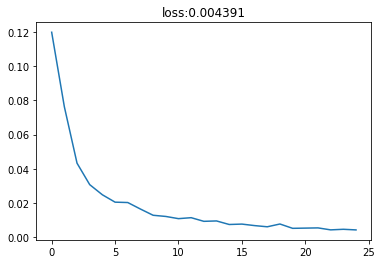

In [387]:
from keras.layers import Dropout

# Create model with dropout
model_3 = Sequential()
model_3.add(Dense(100, input_dim=scaled_train_features.shape[1], activation='relu'))
model_3.add(Dropout(0.2))
model_3.add(Dense(20, activation='relu'))
model_3.add(Dense(1, activation='linear'))

# Fit model with mean squared error loss function
model_3.compile(optimizer='adam', loss='mse')
history = model_3.fit(scaled_train_features, train_targets, epochs=25)
plt.plot(history.history['loss'])
plt.title('loss:' + str(round(history.history['loss'][-1], 6)))
plt.show()

In [388]:
# Make predictions from the 3 neural net models
train_pred1 = model_1.predict(scaled_train_features)
test_pred1 = model_1.predict(scaled_test_features)

train_pred2 = model_2.predict(scaled_train_features)
test_pred2 = model_2.predict(scaled_test_features)

train_pred3 = model_3.predict(scaled_train_features)
test_pred3 = model_3.predict(scaled_test_features)

# Horizontally stack predictions and take the average across rows
train_preds = np.mean(np.hstack((train_pred1, train_pred2, train_pred3)), axis=1)
test_preds = np.mean(np.hstack((test_pred1,test_pred2, test_pred3)), axis=1)
print(test_preds[-5:])

[ 0.07031336 -0.22929911 -0.1933192  -0.19491701 -0.18464427]


0.7945373472966464
-1.0940187250447884


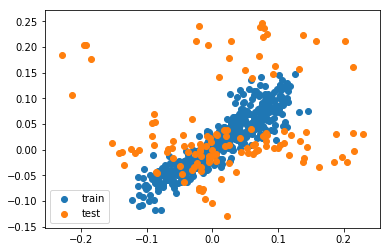

In [389]:
from sklearn.metrics import r2_score

# Evaluate the R^2 scores
print(r2_score(train_targets, train_preds))
print(r2_score(test_targets, test_preds))

# Scatter the predictions vs actual -- this one is interesting!
plt.scatter(train_preds, train_targets, label='train')
plt.scatter(test_preds, test_targets, label='test')
plt.legend(); plt.show()